# **YouTube Statistics Analysis**

#### Imports (Always run before starting)

In [1]:

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd
import numpy as np
import datetime as dt
import json 
import requests

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud # Still Learning to use wordcloud



## Contents

1. **Introduction**
    - Research question.
2. **Data Collection**
    - API setup and data retrieval code.
3. **Data Preprocessing**
    - Cleaning and feature extraction code.
4. **Exploratory Data Analysis (EDA)**
    - Visualizations and initial insights.
5. **Hypothesis Testing**
    - Statistical analysis and results.
6. **Conclusion**
    - Summary of findings and implications

## **1. Introduction**

- **Primary Question:** Has there been any changes in trend of data science and AI-related videos on YouTube?

Note: This question can be further explored but I have just left it at this for the purposes of this project.

## **2. Data Collection**

### API Key


In [149]:
# api = ##############################

### Prerequisites Packages

In [150]:
#!pip install --upgrade google-api-python-client

In [151]:
#!pip install --upgrade google-auth-oauthlib google-auth-httplib2

### First API call (Youtube Search)

In [ ]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=api)

def get_youtube_search_results(youtube, query, max_results, total_results, published_after, published_before):
    all_results = []
    next_page_token = None
# Created a while loop since max result for each search query is limited to 50
    while len(all_results) < total_results:
        request = youtube.search().list(
            part = "snippet",
            maxResults = max_results,
            order = "date",
            publishedAfter = published_after,
            publishedBefore = published_before,
            q = query,
            videoDuration = "any",
            pageToken = next_page_token
        )
        response = request.execute()
        all_results.extend(response['items'])
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    
    return all_results[:total_results]

results = get_youtube_search_results(
    youtube,
    query="Data Science | Artificial Intelligence | AI | Machine Learning | Deep Learning",
    max_results=50,
    total_results=1000,
    published_after="2013-01-01T00:00:00Z",
    published_before="2025-01-01T00:00:00Z"
)
print(type(results))
print(results)


#### Prep / Cleaning Data for Second API call

Checking the length of results

In [181]:
#checking the length of results
print(len(results))

600


Checking the first video information

In [182]:
#checking the first video information
snippet_info = results[0]
snippet_info

{'kind': 'youtube#searchResult',
 'etag': 'T1Umoo3nnDgD1FvEoYmyC4d_jqM',
 'id': {'kind': 'youtube#video', 'videoId': 'nkvKQhwD53M'},
 'snippet': {'publishedAt': '2024-06-19T04:49:40Z',
  'channelId': 'UCCRQKpGX1eaevi0BGIu9b_Q',
  'title': 'RAG Vs Self-RAG  #ai #naturallanguageprocessing #shorts #shortsfeed  #datascience #machinelearning',
  'description': 'RAG Vs Self-RAG #ai #naturallanguageprocessing #shorts #shortsfeed #datascience #machinelearning Full ...',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/nkvKQhwD53M/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/nkvKQhwD53M/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/nkvKQhwD53M/hqdefault.jpg',
    'width': 480,
    'height': 360}},
  'channelTitle': 'Datascience Monster',
  'liveBroadcastContent': 'none',
  'publishTime': '2024-06-19T04:49:40Z'}}

Extracting relevant fields to save as dataframe.

In [183]:
# Extracting relevant fields to save as dataframe.
video_data = []

for item in results:
    video_id = item['id'].get('videoId')
    if video_id:  # Only appending if the video_id is not None
        video_data.append({
            'videoId': video_id,
            'publishedAt': item['snippet']['publishedAt'],
            'channelId': item['snippet']['channelId'],
            'title': item['snippet']['title'],
            'description': item['snippet']['description'],
            'channelTitle': item['snippet']['channelTitle']
        })
        

#### Video dataframe

Saving as dataframe

In [184]:
video_df = pd.DataFrame(video_data)
video_df

,videoId,publishedAt,channelId,title,description,channelTitle
0,nkvKQhwD53M,2024-06-19T04:49:40Z,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessing...,Datascience Monster
1,S_LwI91oxfw,2024-06-19T04:30:17Z,UCMrZEdOcwhofuLRscG4gafQ,Master Python&#39;s NumPy for Data Science &am...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis
2,sgeqRf28sec,2024-06-19T03:57:00Z,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,Shorts #ShortsTrend #ShortsChallenge #ShortsVi...,Deepu reactions
3,4UmK7Te2a_o,2024-06-19T02:07:00Z,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi
4,jSAT_RuJ_Cg,2024-06-18T22:00:01Z,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk
...,...,...,...,...,...,...
595,uBV0w8Qwhv4,2019-07-01T14:30:02Z,UCsvqVGtbbyHaMoevxPAq9Fg,How To Become An Artificial Intelligence Engin...,Professional Certificate Course In AI And Mach...,Simplilearn
596,ZJixNvx9BAc,2019-06-20T16:00:06Z,UCftwRNsjfRo08xYE31tkiyw,Machine Learning: Living in the Age of AI | A ...,"Machine Learning: Living in the Age of AI,” ex...",WIRED
597,j6EB9HO6acE,2019-06-20T14:28:17Z,UCkw4JCwteGrDHIsyIIKo4tQ,Artificial Intelligence In Healthcare | Exampl...,Machine Learning Engineer Masters Program: htt...,edureka!
598,bfmFfD2RIcg,2019-06-19T14:30:00Z,UCsvqVGtbbyHaMoevxPAq9Fg,Neural Network In 5 Minutes | What Is A Neural...,Professional Certificate Course In AI And Mach...,Simplilearn


Saving the dataframe to csv for further analysis

In [185]:
#saving the dataframe to csv for further analysis
video_df.to_csv('video_data.csv', index=False)

### Second API call (video stats by video id)

In [186]:
# Extracting video_id field for second API call.
# Extracting video id if exists
video_ids = [item['id'].get('videoId') for item in results if 'videoId' in item['id']]
print(len(video_ids)) # this is to check the number of values.


600


In [187]:
Set up the API client to query for video details for each video_id
api_service_name = "youtube"
api_version = "v3"

# Initialize the API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=api)

def get_video_details(youtube, video_ids):
    all_responses = []
    
    for i in range(0, len(video_ids), 50): #step 50 per request
        group = video_ids[i:i+50]  # Slice the video IDs into batches of 50
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(group),  # Join the group into a comma-separated string
            maxResults=50
        )
        response = request.execute()  # Execute the API request
        all_responses.extend(response.get('items', []))  # Extend the all_responses list with the current group
    
    return all_responses

# video_details for each video in groups
video_details = get_video_details(youtube, video_ids)

print(f"Retrieved details for {len(video_details)} videos")


Retrieved details for 600 videos


#### Prep / Cleaning Data of the second API call

Checking if queried data is correct

In [188]:
#checking if queried data is correct
print(f'length of the list: {len(video_details)}')
video_details[6]

length of the list: 600


{'kind': 'youtube#video',
 'etag': '4b0oyBfH89esrWZuKDnVa-6SMtU',
 'id': 'AGzxFHlh3pk',
 'snippet': {'publishedAt': '2024-06-18T22:00:05Z',
  'channelId': 'UCw_LFe2pS8x3NyipGNJgeEA',
  'title': 'Top 22 BEST Data Science & Analytics Certifications',
  'description': "🚀 Get $1,000 Off Springboard Data Science/Analytics Bootcamp! Act fast! Limited spots.\nhttps://bit.ly/3vC7phX\n\n▬▬▬▬\n\nLooking for the best data science certifications? Check out our list of the top 22 certification programs in data science to advance your career. We'll cover data engineering certifications, data analyst certifications, and general data science / machine learning certifications.\n\nTHIS VIDEO IS A COMPILATION OF MY OTHER 3 VIDEOS COVERING CERTIFICATIONS\n\nThe information on this YouTube Channel and the resources available are for educational and informational purposes only. As an affiliate, I may earn when you sign up to websites/ for services provided in the description. This allows me to run the chann

Extracting relevant fields to save as dataframe.

In [189]:
# Extracting relevant fields to save as dataframe.
video_stats = []
for item in video_details[:]:
    video_stats.append({
        'channelId': item['snippet']['channelId'],
        'title': item['snippet']['title'],
        'description': item['snippet']['description'],
        'channelTitle': item['snippet']['channelTitle'],
        'tags': item['snippet'].get('tags', None),
        'categoryId': item['snippet']['categoryId'],
        'defaultLanguage': item['snippet'].get('defaultLanguage', None), #fill missing values with None
        'viewCount': item['statistics'].get('viewCount', '0'),
        'likeCount': item['statistics'].get('likeCount', '0'),
        'favoriteCount': item['statistics'].get('favoriteCount', '0'),
        'commentCount': item['statistics'].get('commentCount', '0')
        })



#### Video_Stats dataframe

Converting to dataframe

In [190]:
#converting to dataframe
video_stats_df = pd.DataFrame(video_stats)

In [191]:
#checking the dataframe
video_stats_df.head()

,channelId,title,description,channelTitle,tags,categoryId,defaultLanguage,viewCount,likeCount,favoriteCount,commentCount
0,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessin...,Datascience Monster,None,22,None,2,0,0,1
1,UCMrZEdOcwhofuLRscG4gafQ,Master Python's NumPy for Data Science & Machi...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis,"[numpy, python, python numpy, pandas is built ...",27,None,0,0,0,0
2,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,#Shorts\n\n#ShortsTrend\n\n#ShortsChallenge\n\...,Deepu reactions,"[viral, trending, shorts, popular, reaction, f...",24,hi,0,0,0,0
3,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi,"[datascience, outliers, anomaly, anomalydetect...",27,None,5,2,0,0
4,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk,None,28,None,9256,479,0,109


Saving it to csv for furture analysis

In [192]:
#saving it to csv for furture analysis
video_stats_df.to_csv('video_stats.csv', index=False)

## **3. Data Processing**

### Read CSVs (Clean)

In [193]:
video_df = pd.read_csv('video_data.csv')

In [194]:
v_stat_df = pd.read_csv('video_stats.csv')

Checking correctly imported

In [195]:
#not going to be using this dataframe a lot
video_df.head()

,videoId,publishedAt,channelId,title,description,channelTitle
0,nkvKQhwD53M,2024-06-19T04:49:40Z,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessing...,Datascience Monster
1,S_LwI91oxfw,2024-06-19T04:30:17Z,UCMrZEdOcwhofuLRscG4gafQ,Master Python&#39;s NumPy for Data Science &am...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis
2,sgeqRf28sec,2024-06-19T03:57:00Z,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,Shorts #ShortsTrend #ShortsChallenge #ShortsVi...,Deepu reactions
3,4UmK7Te2a_o,2024-06-19T02:07:00Z,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi
4,jSAT_RuJ_Cg,2024-06-18T22:00:01Z,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk


In [196]:
v_stat_df.head()

,channelId,title,description,channelTitle,tags,categoryId,defaultLanguage,viewCount,likeCount,favoriteCount,commentCount
0,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessin...,Datascience Monster,NaN,22,NaN,2,0,0,1
1,UCMrZEdOcwhofuLRscG4gafQ,Master Python's NumPy for Data Science & Machi...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis,"['numpy', 'python', 'python numpy', 'pandas is...",27,NaN,0,0,0,0
2,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,#Shorts\n\n#ShortsTrend\n\n#ShortsChallenge\n\...,Deepu reactions,"['viral', 'trending', 'shorts', 'popular', 're...",24,hi,0,0,0,0
3,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi,"['datascience', 'outliers', 'anomaly', 'anomal...",27,NaN,5,2,0,0
4,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk,NaN,28,NaN,9256,479,0,109


### Initial Exploration of Data

Checking for overall df info

In [197]:
v_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelId        600 non-null    object
 1   title            600 non-null    object
 2   description      590 non-null    object
 3   channelTitle     600 non-null    object
 4   tags             473 non-null    object
 5   categoryId       600 non-null    int64 
 6   defaultLanguage  148 non-null    object
 7   viewCount        600 non-null    int64 
 8   likeCount        600 non-null    int64 
 9   favoriteCount    600 non-null    int64 
 10  commentCount     600 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 51.7+ KB


Checking for any null values

In [198]:
v_stat_df.isnull().sum()

channelId            0
title                0
description         10
channelTitle         0
tags               127
categoryId           0
defaultLanguage    452
viewCount            0
likeCount            0
favoriteCount        0
commentCount         0
dtype: int64

Dropping default language as there were too many (446 out of 557) null values and is not 
highly relevant to the analysis.

In [199]:
v_stat_df = v_stat_df.drop(columns=['defaultLanguage'])
v_stat_df['tags'].fillna('None', inplace=True)

Checking for any duplicated values and dropping them

In [200]:
v_stat_df.duplicated().sum()
v_stat_df.drop_duplicates(inplace=True)

checking for unique values and counts for 'favoriteCount'

In [201]:
v_stat_df['favoriteCount'].value_counts()

favoriteCount
0    567
Name: count, dtype: int64

Dropping 'favoriteCount' column

In [202]:
#since all values are 0, dropping the column
v_stat_df = v_stat_df.drop(columns=['favoriteCount'])

Grabbing published dates from the video_df

In [203]:
v_stat_df['publishedAt'] = video_df['publishedAt']
video_df['publishedAt']

0      2024-06-19T04:49:40Z
1      2024-06-19T04:30:17Z
2      2024-06-19T03:57:00Z
3      2024-06-19T02:07:00Z
4      2024-06-18T22:00:01Z
               ...         
595    2019-07-01T14:30:02Z
596    2019-06-20T16:00:06Z
597    2019-06-20T14:28:17Z
598    2019-06-19T14:30:00Z
599    2019-06-14T09:27:51Z
Name: publishedAt, Length: 567, dtype: object

Checking info for any illogical dtypes

In [204]:
v_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channelId     567 non-null    object
 1   title         567 non-null    object
 2   description   557 non-null    object
 3   channelTitle  567 non-null    object
 4   tags          567 non-null    object
 5   categoryId    567 non-null    int64 
 6   viewCount     567 non-null    int64 
 7   likeCount     567 non-null    int64 
 8   commentCount  567 non-null    int64 
 9   publishedAt   567 non-null    object
dtypes: int64(4), object(6)
memory usage: 48.7+ KB


'publishedAt' seems to be an object, converting this to datetime

In [205]:
#setting the 'publishedAt' column to datetime format
v_stat_df['publishedAt'] = pd.to_datetime(v_stat_df['publishedAt'])

# Display the head of the dataframe
v_stat_df['publishedAt'].head()

0   2024-06-19 04:49:40+00:00
1   2024-06-19 04:30:17+00:00
2   2024-06-19 03:57:00+00:00
3   2024-06-19 02:07:00+00:00
4   2024-06-18 22:00:01+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

In [206]:
#checking the datatime conversion
v_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   channelId     567 non-null    object             
 1   title         567 non-null    object             
 2   description   557 non-null    object             
 3   channelTitle  567 non-null    object             
 4   tags          567 non-null    object             
 5   categoryId    567 non-null    int64              
 6   viewCount     567 non-null    int64              
 7   likeCount     567 non-null    int64              
 8   commentCount  567 non-null    int64              
 9   publishedAt   567 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 48.7+ KB


### Updating Columns

Seperating year, month and day for detailed analysis

In [207]:
#seperating year, month and day for detailed analysis
v_stat_df['year'] = v_stat_df['publishedAt'].dt.year
v_stat_df['month'] = v_stat_df['publishedAt'].dt.month
v_stat_df['day'] = v_stat_df['publishedAt'].dt.day

v_stat_df.head()

,channelId,title,description,channelTitle,tags,categoryId,viewCount,likeCount,commentCount,publishedAt,year,month,day
0,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessin...,Datascience Monster,None,22,2,0,1,2024-06-19 04:49:40+00:00,2024,6,19
1,UCMrZEdOcwhofuLRscG4gafQ,Master Python's NumPy for Data Science & Machi...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis,"['numpy', 'python', 'python numpy', 'pandas is...",27,0,0,0,2024-06-19 04:30:17+00:00,2024,6,19
2,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,#Shorts\n\n#ShortsTrend\n\n#ShortsChallenge\n\...,Deepu reactions,"['viral', 'trending', 'shorts', 'popular', 're...",24,0,0,0,2024-06-19 03:57:00+00:00,2024,6,19
3,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi,"['datascience', 'outliers', 'anomaly', 'anomal...",27,5,2,0,2024-06-19 02:07:00+00:00,2024,6,19
4,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk,None,28,9256,479,109,2024-06-18 22:00:01+00:00,2024,6,18


Counting length of title (new column)

In [208]:
#new column for counting length of title.(code is counting number of spaces + 1)
v_stat_df['title_count'] = v_stat_df['title'].str.count(' ') + 1
v_stat_df.head()

,channelId,title,description,channelTitle,tags,categoryId,viewCount,likeCount,commentCount,publishedAt,year,month,day,title_count
0,UCCRQKpGX1eaevi0BGIu9b_Q,RAG Vs Self-RAG #ai #naturallanguageprocessin...,RAG Vs Self-RAG #ai #naturallanguageprocessin...,Datascience Monster,None,22,2,0,1,2024-06-19 04:49:40+00:00,2024,6,19,11
1,UCMrZEdOcwhofuLRscG4gafQ,Master Python's NumPy for Data Science & Machi...,Test your NumPy knowledge in this fun and fast...,Tech Parenthesis,"['numpy', 'python', 'python numpy', 'pandas is...",27,0,0,0,2024-06-19 04:30:17+00:00,2024,6,19,11
2,UCKDsG3Yo3K2wgw6qEj_MogQ,wait for end 😂😂 #cartoon #animation #funny #fu...,#Shorts\n\n#ShortsTrend\n\n#ShortsChallenge\n\...,Deepu reactions,"['viral', 'trending', 'shorts', 'popular', 're...",24,0,0,0,2024-06-19 03:57:00+00:00,2024,6,19,13
3,UCpTh-_R2_iyCKs_Wnd-vNhw,Outlier Detection in Machine Learning: Your Ul...,Outlier Detection in Machine Learning: Your Ul...,Ashok Tapasi,"['datascience', 'outliers', 'anomaly', 'anomal...",27,5,2,0,2024-06-19 02:07:00+00:00,2024,6,19,13
4,UCMLtBahI5DMrt0NPvDSoIRQ,50% on ARC Challenge?!,"The ARC Challenge, created by Francois Chollet...",Machine Learning Street Talk,None,28,9256,479,109,2024-06-18 22:00:01+00:00,2024,6,18,4


In [209]:
#checking if there are any null values in the title word count
v_stat_df['title_count'].isnull().sum()

0

In [210]:
v_stat_df.to_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_1\Updated csv\Updated_video_stats.csv', index=False)

## 4. **Exploratory Data Analysis (EDA)**

### Read CSV (Updated)

In [60]:
data = pd.read_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_1\Updated csv\Updated_video_stats.csv')
v_stat = pd.DataFrame(data)

In [61]:
v_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channelId     567 non-null    object
 1   title         567 non-null    object
 2   description   557 non-null    object
 3   channelTitle  567 non-null    object
 4   tags          454 non-null    object
 5   categoryId    567 non-null    int64 
 6   viewCount     567 non-null    int64 
 7   likeCount     567 non-null    int64 
 8   commentCount  567 non-null    int64 
 9   publishedAt   567 non-null    object
 10  year          567 non-null    int64 
 11  month         567 non-null    int64 
 12  day           567 non-null    int64 
 13  title_count   567 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 62.1+ KB


With datetime, when saved as csv and reading it back, it can turn it back into object

In [62]:
#setting the 'publishedAt' column to datetime format....again....
v_stat['publishedAt'] = pd.to_datetime(v_stat['publishedAt'])

# Display the info of the column to check
v_stat['publishedAt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 567 entries, 0 to 566
Series name: publishedAt
Non-Null Count  Dtype              
--------------  -----              
567 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 4.6 KB


In [63]:
#checking unique values of publishedAt
v_stat['publishedAt'].unique()

<DatetimeArray>
['2024-06-19 04:49:40+00:00', '2024-06-19 04:30:17+00:00',
 '2024-06-19 03:57:00+00:00', '2024-06-19 02:07:00+00:00',
 '2024-06-18 22:00:01+00:00', '2024-06-18 22:00:21+00:00',
 '2024-06-18 22:00:05+00:00', '2024-06-18 20:51:33+00:00',
 '2024-06-18 18:00:33+00:00', '2024-06-18 18:00:17+00:00',
 ...
 '2019-08-06 15:19:25+00:00', '2019-07-28 05:27:28+00:00',
 '2019-07-26 14:06:50+00:00', '2019-07-21 08:33:22+00:00',
 '2019-07-04 19:36:13+00:00', '2019-07-01 14:30:02+00:00',
 '2019-06-20 16:00:06+00:00', '2019-06-20 14:28:17+00:00',
 '2019-06-19 14:30:00+00:00', '2019-06-14 09:27:51+00:00']
Length: 566, dtype: datetime64[ns, UTC]

### Numerical Analysis

#### Summary Statistics

In [64]:
print(v_stat.describe())

       categoryId     viewCount      likeCount  commentCount         year  \
count  567.000000  5.670000e+02     567.000000    567.000000   567.000000   
mean    26.560847  3.167116e+05    7202.723104    266.996473  2021.447972   
std      2.223251  1.452242e+06   32899.929048   1287.553619     1.506297   
min      1.000000  0.000000e+00       0.000000      0.000000  2019.000000   
25%     27.000000  4.548500e+03      79.000000      4.000000  2020.000000   
50%     27.000000  1.538300e+04     378.000000     25.000000  2021.000000   
75%     27.000000  1.033835e+05    2182.000000    109.500000  2022.000000   
max     29.000000  2.509365e+07  606153.000000  20613.000000  2024.000000   

            month         day  title_count  
count  567.000000  567.000000   567.000000  
mean     6.403880   16.135802    12.186949  
std      3.156269    8.068451     3.392515  
min      1.000000    1.000000     2.000000  
25%      5.000000   10.000000    10.000000  
50%      6.000000   17.000000    13.

#### Overall Observations
- [View_Count], [Like_Count], and [Comment_Count] all show signs of high variability with potential outliers, suggesting that a small number of videos have very high engagement metrics while most videos have relatively lower engagement.

- [Year], [Month], and [Day] distributions indicate a balanced dataset over time, allowing for meaningful trend analysis.

- [Title_Count] shows some variability in the number of words in video titles


#### Detailed Observations 


- For 'categoryId' the minimum category ID is 1, and the maximum is 29 with a mean of 26.5. The majority of videos fall within a narrow range around 27.

- For 'viewCount the mean view count is 316,711, but the standard deviation is extremely high (1,452,242), which indicates many videos having a low view count and a few having very high view counts, suggesting the presence of outliers.

- For 'likeCount' the mean like count is 7,202, with a very high standard deviation of 32,899. (potential outliers)

- For 'commentCount' the mean comment count is 267, with a standard deviation of 1,287.Also number of comments ranges from 0 to over 20,000 (potential outliers)

- For 'year' the dataset covers the years from 2019 to 2024, with a mean year of around 2021.45, indicating a fairly balanced distribution over these years.

- For 'month' the mean month is 6.40, indicating a spread throughout the year with no significant concentration in any specific month.

- For 'day' the mean day is 16.14, indicating a fairly even distribution of video publication dates throughout the month.

- For 'title_count' the average title length is 12.19 words, with a standard deviation of 3.39 words, indicating some variability in title lengths.

### Distribution of Numerical Features

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


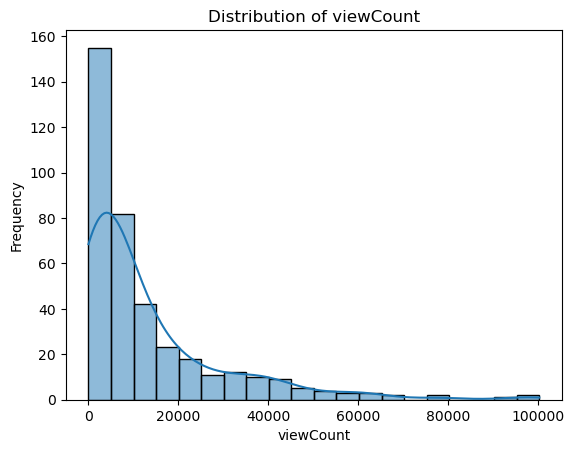

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


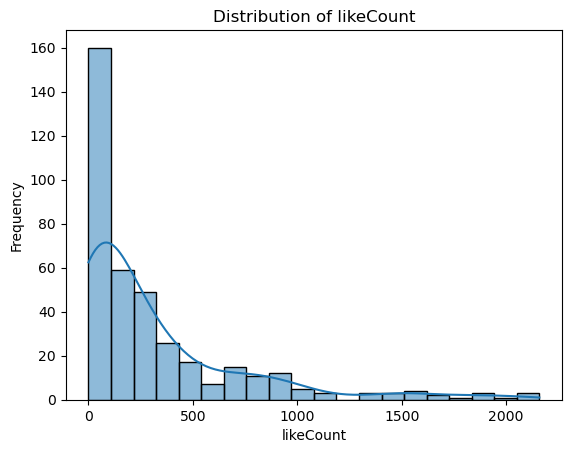

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


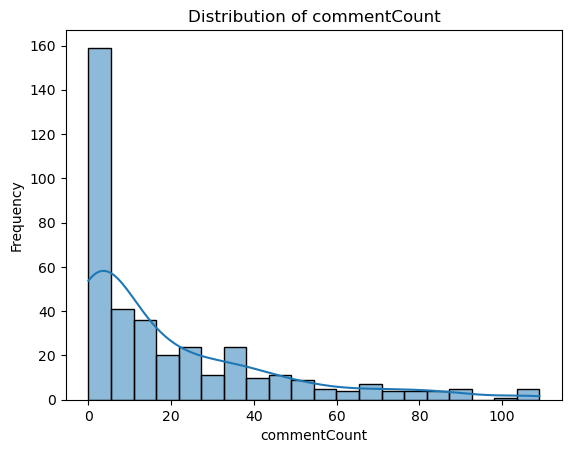

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


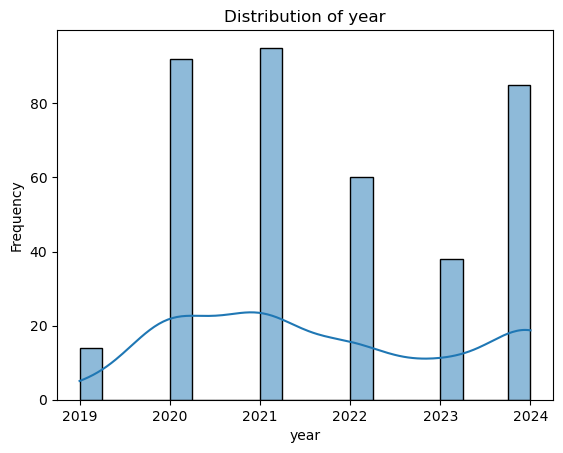

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


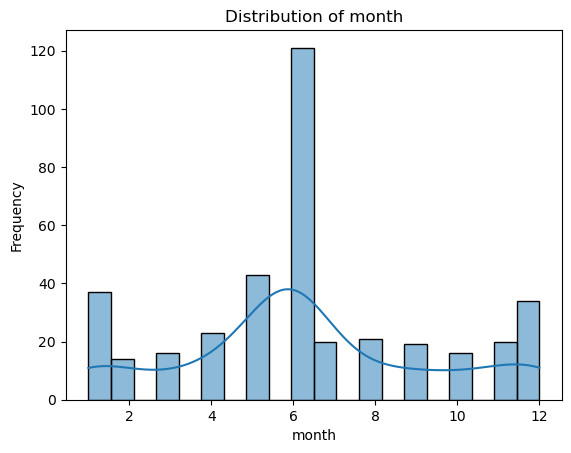

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


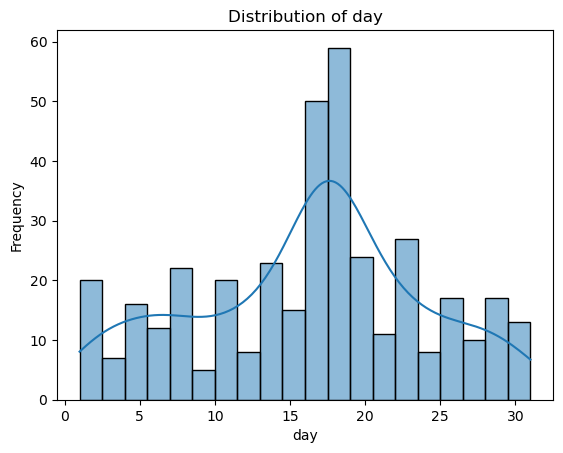

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


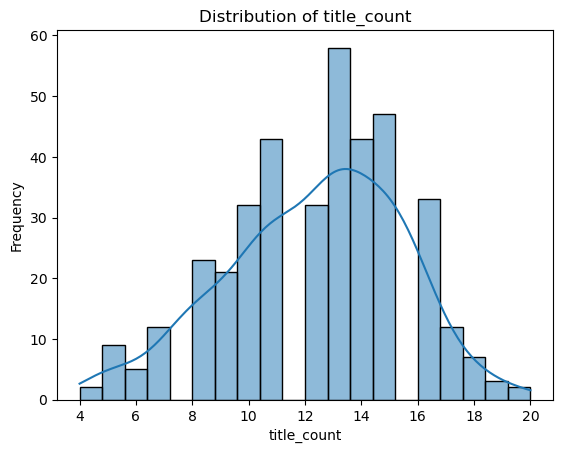

In [67]:
#filtering the dataset to remove outliers for the purposed of distribution
view_count_filtered = v_stat['viewCount'].quantile(0.75)
like_count_filtered = v_stat['likeCount'].quantile(0.75)
commnet_count_filtered = v_stat['commentCount'].quantile(0.75)

filtered_v_stat = v_stat[(v_stat['viewCount'] <= view_count_filtered) & 
                         (v_stat['likeCount'] <= like_count_filtered) & 
                         (v_stat['commentCount'] <= commnet_count_filtered)
                         ]

# setting up list for numerical columns
numerical_columns = ['viewCount', 
                     'likeCount', 
                     'commentCount', 
                     'year', 
                     'month', 
                     'day', 
                     'title_count'
                     ]

#checking the distribution of numerical columns - difficulty in using FacetGrid so just went with for loop
for column in numerical_columns:
    sns.histplot(data=filtered_v_stat, x=column, bins=20, kde=True) # change v_stat to filtered_v_stat for outlier removal
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


- **View Count**: Most videos have a low view count, with a few videos having extremely high view counts, indicating a highly skewed distribution.
- **Like Count:** Similar to view count, the like count is also highly skewed, with most videos having very few likes and a few having extremely high like counts.


- **Comment Count:** The distribution of comment counts follows a similar pattern, with most videos having few comments and a small number having many comments.
- **Year, Month, Day:** These features show a more uniform distribution except for some peaks, particularly in the mid-year and around specific days.
- **Title Count:** Follows a somewhat normal distribution but slightly skewed.

### Categorical Analysis

#### Number of Views Per Category

In [19]:
#checking category ids
counts = v_stat['categoryId'].value_counts()
counts.sort_index()

categoryId
1       2
22     52
24     14
25      3
26      2
27    382
28    111
29      1
Name: count, dtype: int64

Defining Category Names

In [20]:
#Define Category Names
category_names = {
    1: 'Film & Animation',
    22: 'People & Blogs',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    }

#assigning category names
v_stat['CategoryName'] = v_stat['categoryId'].map(category_names)

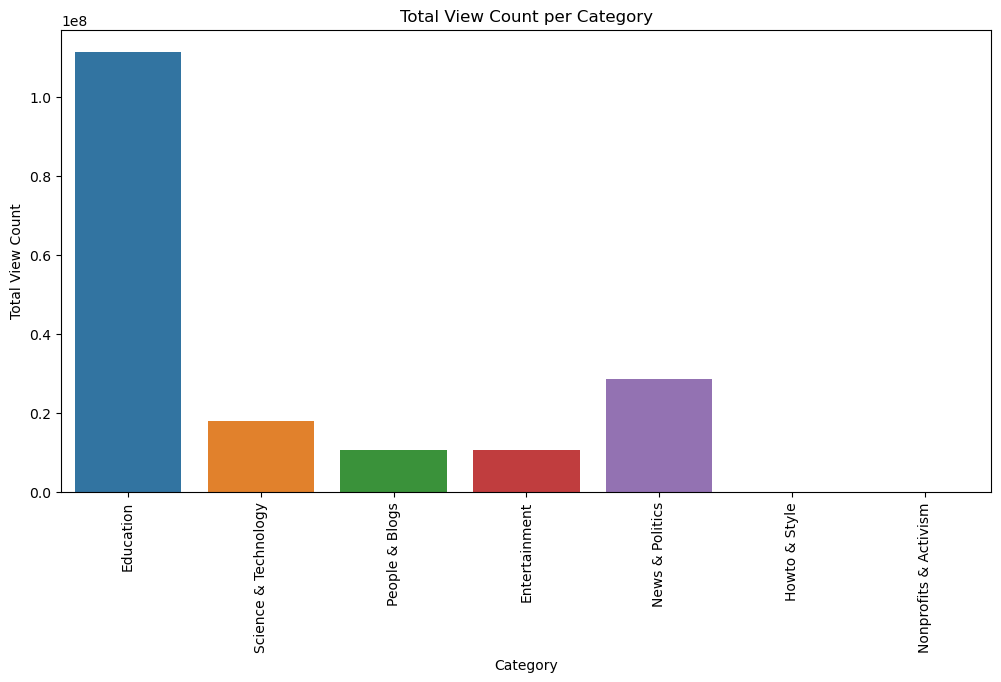

In [21]:
#total view count per category
plt.figure(figsize=(12, 6))
sns.barplot(x='CategoryName', y='viewCount', data=v_stat, estimator=sum, errorbar=None, 
            order=filtered_v_stat.groupby('CategoryName')['viewCount'].sum().sort_values(ascending=False).index)

plt.title('Total View Count per Category')
plt.xlabel('Category')
plt.ylabel('Total View Count')
plt.xticks(rotation=90)
plt.show()


- The graph clearly shows that **Education** is the most popular category by a large margin, with over **100 million total views**.

- **News & Politics** also attracts a significant number of views, followed by **Science & Technology**.

- Categories like **People & Blogs** and **Entertainment** have moderate viewer count.

- **Howto & Style** and **Nonprofits & Activism** have the least viewer count.

#### Yearly Number of Views per Category

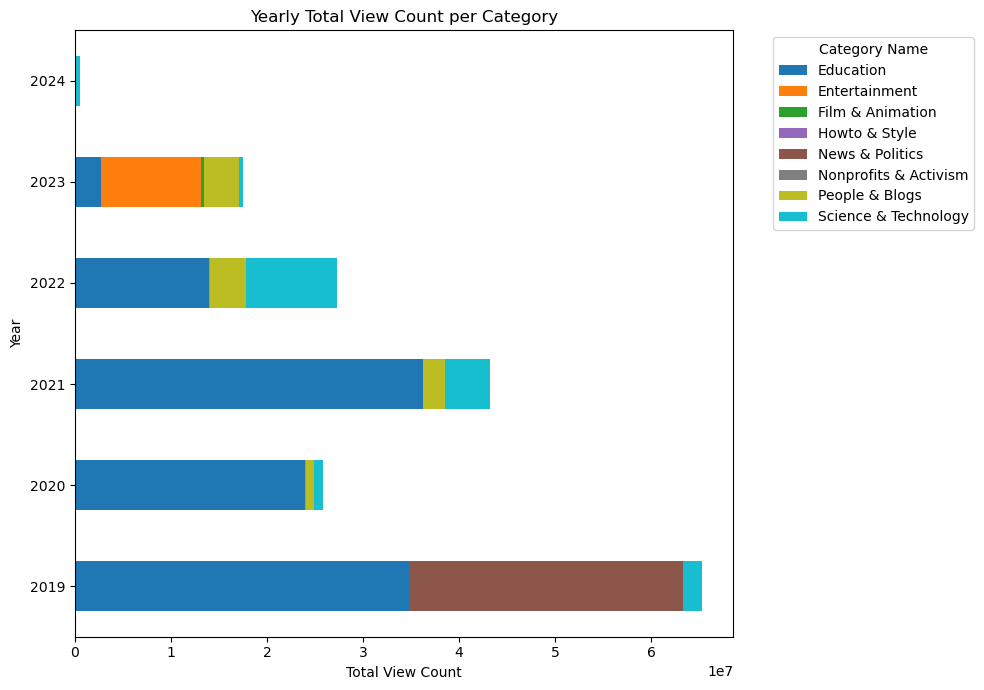

In [22]:
#setup groupby and number of videos
views_per_year = v_stat.groupby(['year', 'CategoryName'])['viewCount'].sum().reset_index(name='Total_View_Count')

#set index to year and columns to category name and using pivot
views_per_year_category = views_per_year.pivot(index='year', columns='CategoryName', values='Total_View_Count')

#plot the bar chart
views_per_year_category.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='tab10')

plt.title('Yearly Total View Count per Category')
plt.xlabel('Total View Count')
plt.ylabel('Year')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Education** consistently has the highest total view count across all years, making it the most popular category.

- The total **view count fluctuates over the years**, with the highest in 2019 and a general increase from 2020 to 2022.

- Other categories like **News & Politics, Science & Technology,** and **Entertainment** also have contributions.

- The total view count in 2024 is notably low, likely due to incomplete data for the year.

### Relationship Analysis

#relationship between numerical features

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

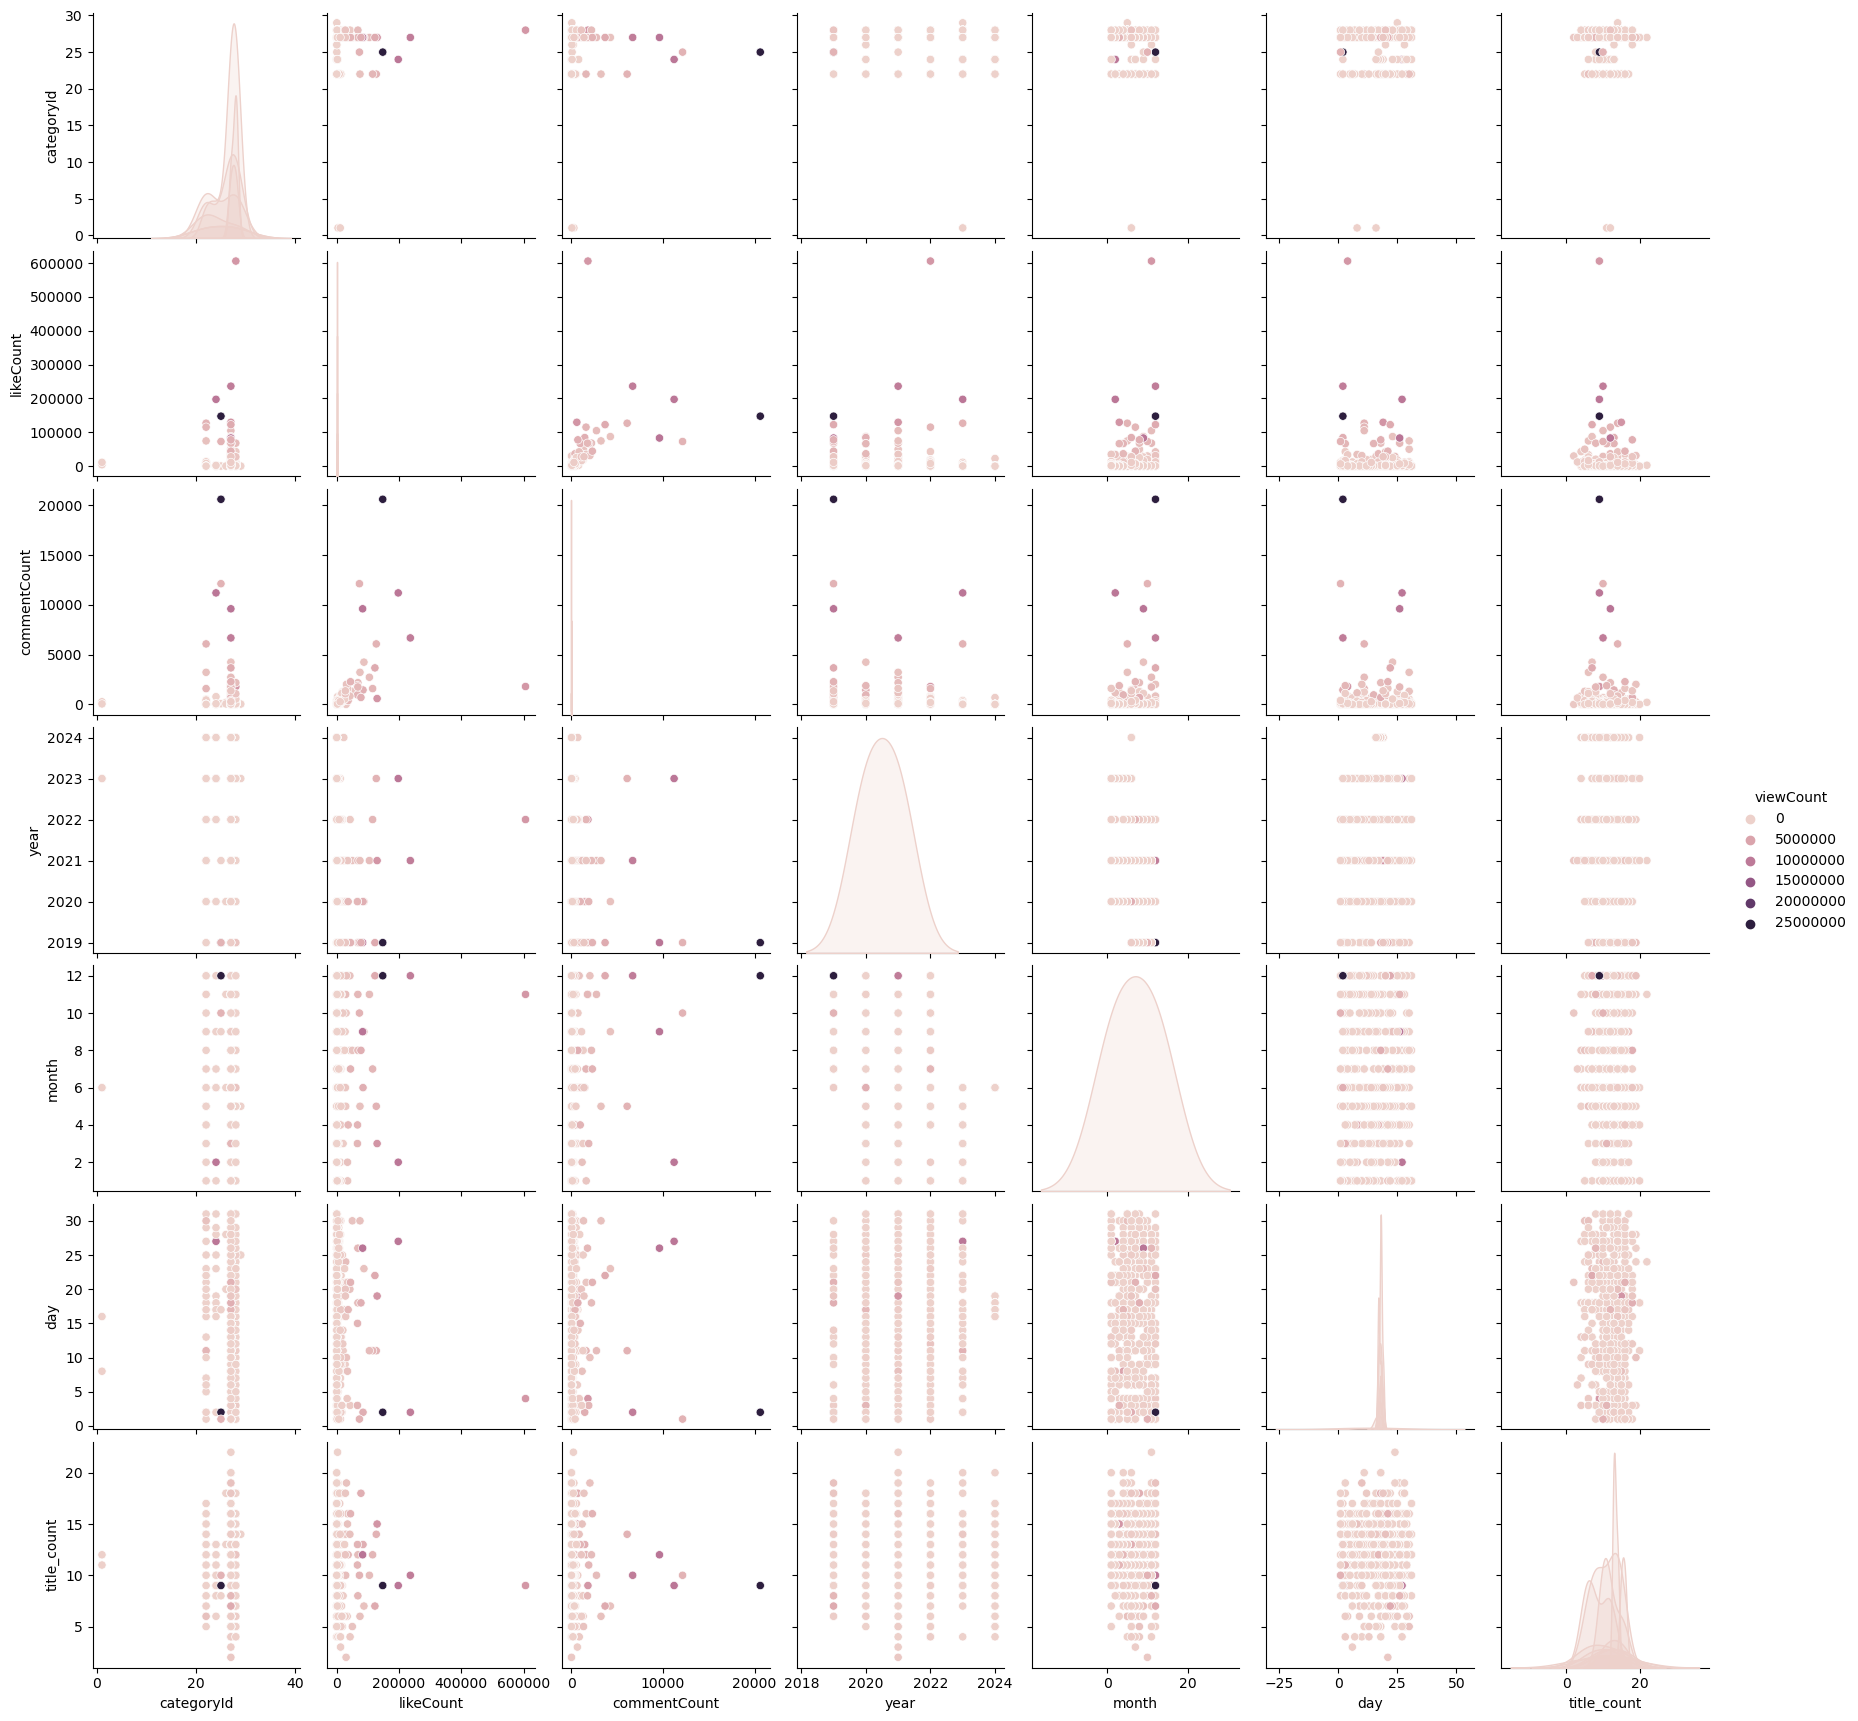

In [23]:
#relationship between numerical features to view count
sns.pairplot(v_stat.select_dtypes('number'), diag_kind='kde', hue='viewCount')
plt.show()

#### Correlation between numerical features

In [24]:
#correlation between numerical features
v_stat[numerical_columns].corr()

,viewCount,likeCount,commentCount,year,month,day,title_count
viewCount,1.000000,0.636386,0.886156,-0.139701,0.094600,-0.070259,-0.066117
likeCount,0.636386,1.000000,0.517025,-0.079077,0.104410,-0.074997,-0.100447
commentCount,0.886156,0.517025,1.000000,-0.135958,0.095895,-0.059295,-0.093168
year,-0.139701,-0.079077,-0.135958,1.000000,-0.226906,0.078575,-0.112879
month,0.094600,0.104410,0.095895,-0.226906,1.000000,0.019350,-0.006239
day,-0.070259,-0.074997,-0.059295,0.078575,0.019350,1.000000,-0.012612
title_count,-0.066117,-0.100447,-0.093168,-0.112879,-0.006239,-0.012612,1.000000


Finding correlation values in decending order

In [25]:
corr_matrix = v_stat[numerical_columns].corr()

# Unstack the correlation matrix - each row of information into columns
corr_unstacked = corr_matrix.unstack()

# Convert the unstacked correlation series to a DataFrame
corr_df = pd.DataFrame(corr_unstacked, columns=['correlation'])

# Reset the index to make it easier to filter
corr_df.reset_index(inplace=True)

# Remove self-correlations by filtering out rows where 'level_0' == 'level_1'
corr_df = corr_df[corr_df['level_0'] != corr_df['level_1']]

# Sort the DataFrame by correlation in descending order
corr_df_sorted = corr_df.sort_values(by='correlation', ascending=False)

# Display the top highest correlation pairs
print(f'{corr_df_sorted.head(10)}\n')

         level_0       level_1  correlation
14  commentCount     viewCount     0.886156
2      viewCount  commentCount     0.886156
1      viewCount     likeCount     0.636386
7      likeCount     viewCount     0.636386
9      likeCount  commentCount     0.517025
15  commentCount     likeCount     0.517025
29         month     likeCount     0.104410
11     likeCount         month     0.104410
30         month  commentCount     0.095895
18  commentCount         month     0.095895



#### Specific Correlations

uncomment for removal of outliers

In [68]:
view_count_filtered = v_stat['viewCount'].quantile(0.75)
like_count_filtered = v_stat['likeCount'].quantile(0.75)
commnet_count_filtered = v_stat['commentCount'].quantile(0.75)

filtered_v_stat = v_stat[(v_stat['viewCount'] <= view_count_filtered) & 
                         (v_stat['likeCount'] <= like_count_filtered) & 
                         (v_stat['commentCount'] <= commnet_count_filtered)
                         ]


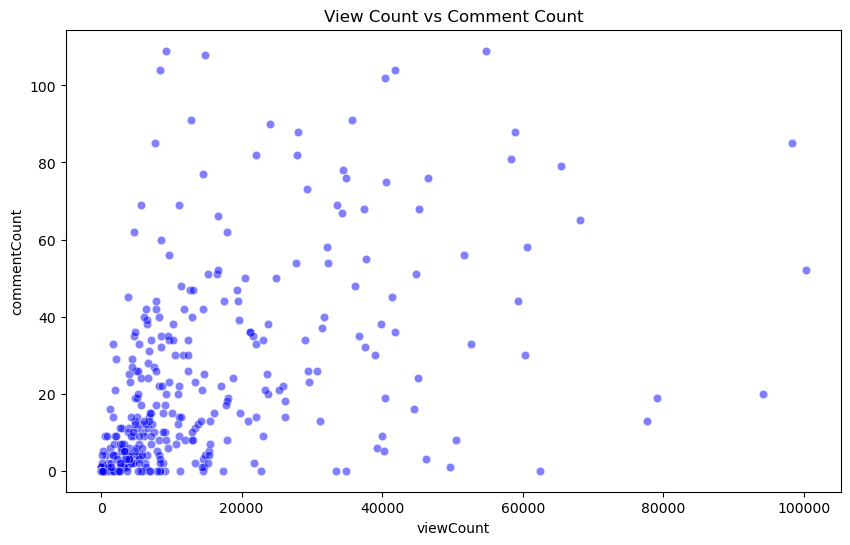

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='viewCount', y='commentCount', data=filtered_v_stat, color='blue', alpha=0.5)
plt.title('View Count vs Comment Count')
plt.show()

- A positive correlation is observed here, where videos with more views tend to have more comments.

- Most data points are clustered at lower view and comment counts.

- A few videos have high view counts with varying comment counts, indicating different levels of viewer engagement.

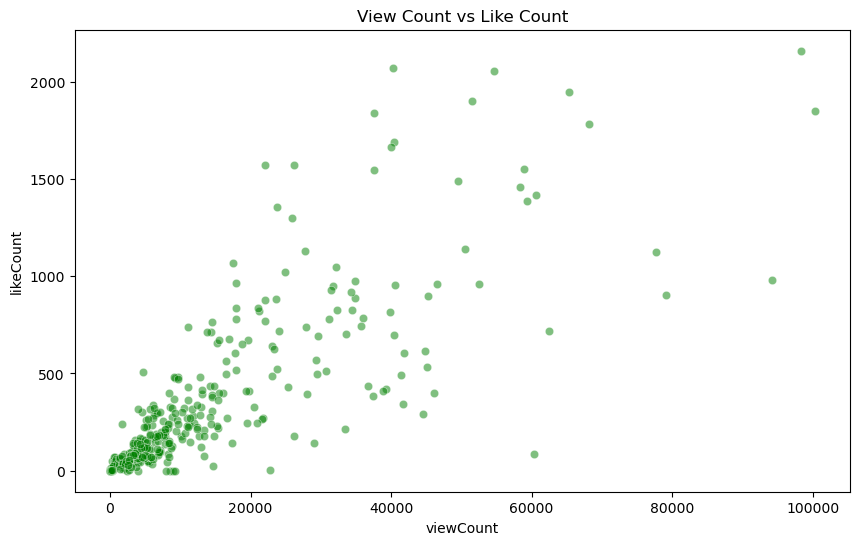

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=filtered_v_stat, color='green', alpha=0.5)
plt.title('View Count vs Like Count')
plt.show()

- There is a positive correlation between view count and like count, indicating that videos with more views generally receive more likes.

- The data points are concentrated at lower values, with some outliers having significantly higher like counts.

- A few videos with high view counts but moderate like counts suggest variability in engagement.

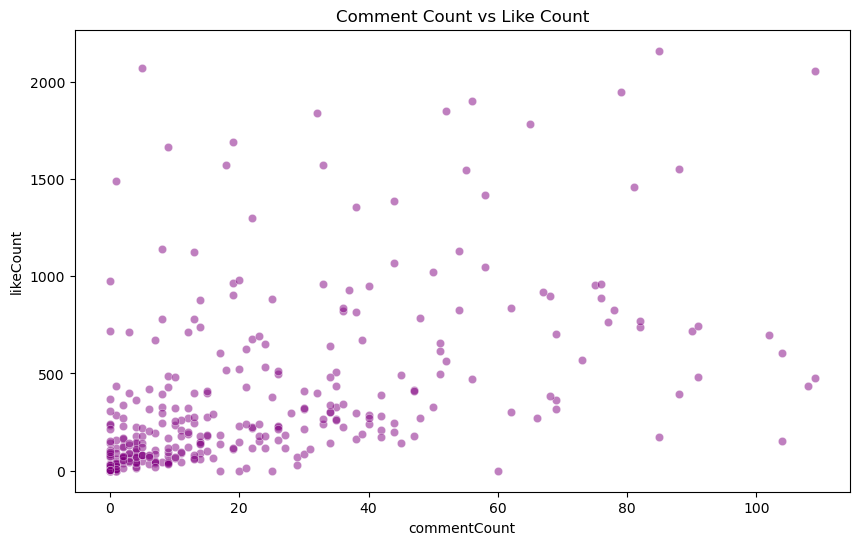

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='commentCount', y='likeCount', data=filtered_v_stat, color='purple', alpha=0.5)
plt.title('Comment Count vs Like Count')
plt.show()

- There is a positive correlation between comment count and like count, suggesting that videos with more comments also receive more likes.

- The majority of data points are concentrated at lower values.

- The spread of data points indicates that while most videos have low comment and like counts, there are notable exceptions with high engagement.

### Trend Investigation

Setting up groupby's

In [75]:
views_per_year = v_stat.groupby('year')['viewCount'].sum().reset_index(name='y_view_count')
views_per_month = v_stat.groupby(['year', 'month'])['viewCount'].sum().reset_index(name='m_view_count')

#checking
views_per_year

,year,y_view_count
0,2019,65250326
1,2020,25859283
2,2021,43190410
3,2022,27252555
4,2023,17484316
5,2024,538605


### Bar Graphs

#### Yearly View Count Trend of Data Science and AI-related Videos

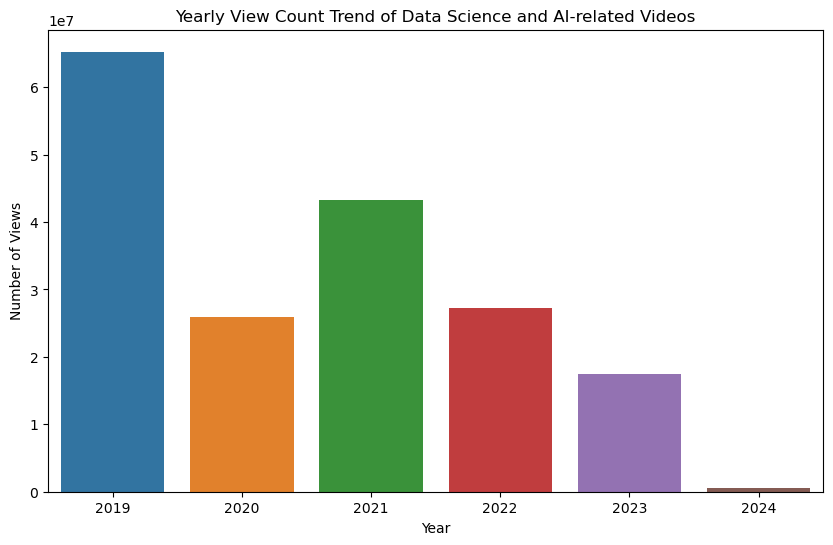

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='y_view_count', data=views_per_year)
plt.title('Yearly View Count Trend of Data Science and AI-related Videos')
plt.xlabel('Year')
plt.ylabel('Number of Views')
plt.show()

- **Peak Year:** 2019 was the peak year with the highest number of views for Data Science and AI-related videos.

- **Fluctuations:** There is a noticeable fluctuation in the number of views over the years. After the peak in 2019, views dropped in 2020, rose again      in 2021, and then started to decline.

- **Recent Trend:** The most recent year, 2024, shows a dramatic decrease in views compared to previous years.
    - **Possible Analysis:**
        This could be due to various factors like changes in content popularity, shifts in viewer interest, external influences affecting viewership or
        likely due to incomplete data for the year.
        


#### Monthly View Count Trend of Data Science and AI-related Videos


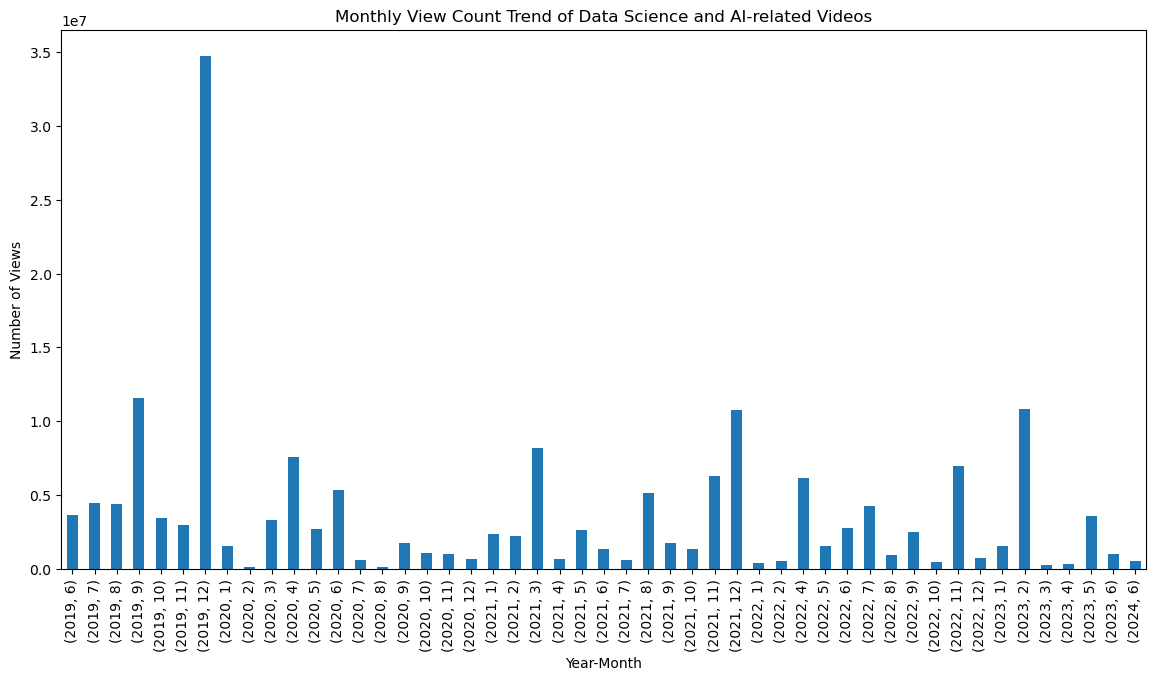

In [32]:
plt.figure(figsize=(14, 7))
# used this to group by and plot the data otherwise I had to create a new year_month column.
views_per_month = v_stat.groupby(['year', 'month'])['viewCount'].sum() 
views_per_month.plot(kind='bar')
plt.title('Monthly View Count Trend of Data Science and AI-related Videos')
plt.xlabel('Year-Month')
plt.ylabel('Number of Views')
plt.show()
# views_per_month  #for checking the output


The chart shows the monthly view count trend for data science and AI-related videos from 2019 to 2024.

- **High Peaks**: Significant spikes in viewer count throughout the months especially in December 2019

- **General Fluctuations:** Viewercount varies month-to-month with notable peaks in December 2019 and December 2021, indicating periodic increases in interest.

- **Low Activity:** Several months show low view counts, especially towards the end of 2023 and into 2024.



### Time Series Graphs

#### Yearly View Count Trend of Data Science and AI-related Videos

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


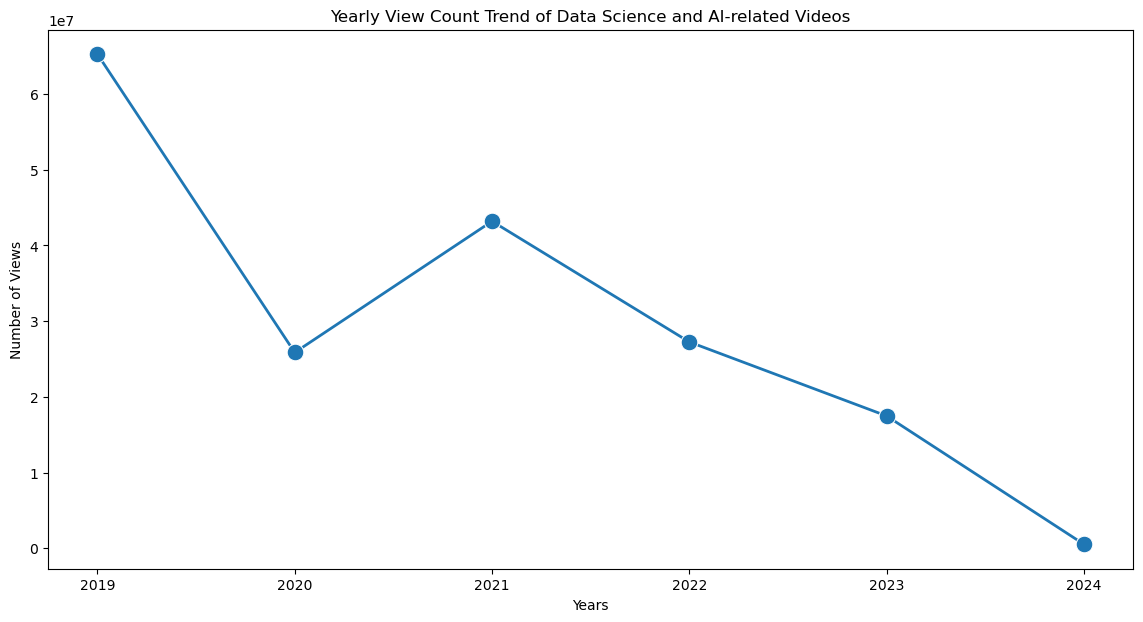

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='y_view_count', data=views_per_year, marker='o', linewidth=2, markersize=12)
plt.title('Yearly View Count Trend of Data Science and AI-related Videos')
plt.xlabel('Years')
plt.ylabel('Number of Views')
plt.show()
#views_per_year

- **Initial High Peak**: 2019 witnessed the highest view count, suggesting a peak interest in data science and AI-related content during that year.
- **Subsequent Decline:** There was a significant drop in view counts in 2020, followed by a recovery in 2021, although not reaching the heights of 2019.
- **Steady Decline:** From 2021 onwards, there is a consistent downward trend in the view counts, indicating a gradual decline in interest.

The overall declining trend could be attributed to several factors, including market saturation, changes in viewer interests, or the emergence of new topics that overshadow data science AI.



#### Monthly View Count Trend of Data Science and AI-related Videos

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

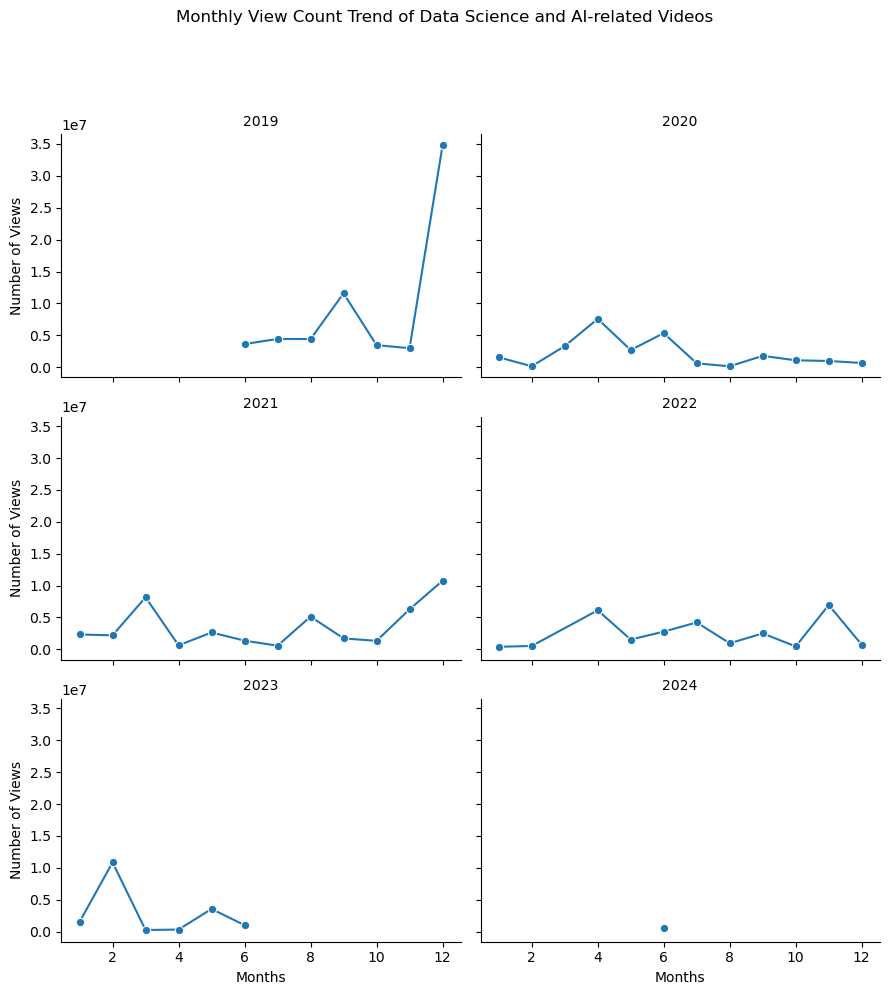

In [40]:
# Each year in a separate plot
views_per_month = v_stat.groupby(['year', 'month'])['viewCount'].sum().reset_index(name='m_view_count')

g = sns.FacetGrid(views_per_month, col="year", col_wrap=2, height=3, aspect=1.5, palette='tab10') #setting up the grids
g.map(sns.lineplot, "month", "m_view_count", marker="o")

#setting up labels and titles
g.set_titles("{col_name}")
g.set_axis_labels("Months", "Number of Views")
g.fig.suptitle('Monthly View Count Trend of Data Science and AI-related Videos', y=1.10)# Title and location of title.
plt.show()


- The overall trend from 2019 to 2024 shows a decline in interest for data science and AI-related videos. The initial high in 2019 is not replicated in subsequent years.
- There are no consistent seasonal patterns except for the notable December spike in 2019. Other years show random fluctuations.



#### Yearly Trend of View, Like, and Comment Counts of Data Science and AI-related Videos (Time Series)

c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GGPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

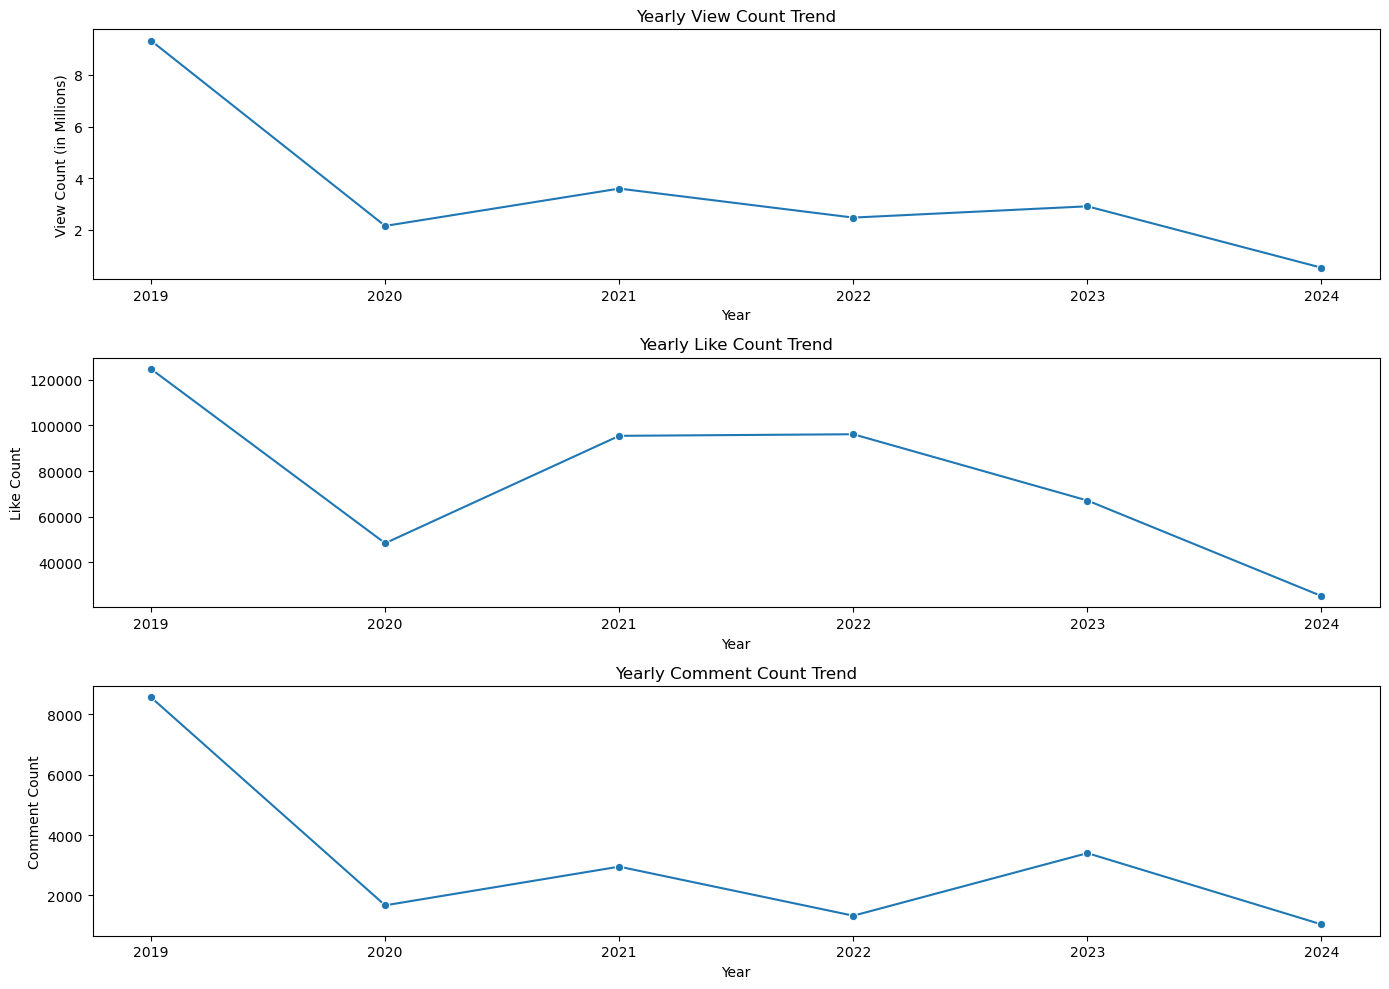

In [41]:
#importing funcformatter for changing unit of y axis for view count
from matplotlib.ticker import FuncFormatter

monthly_stats = v_stat.groupby(['year', 'month']).agg({
    'viewCount': 'sum',
    'likeCount': 'sum',
    'commentCount': 'sum'
}).reset_index()

#it takes argument and divides by 1000000 and returns an integer
formatter = FuncFormatter(lambda y, _: int(y / 1000000))

# Plot the trends
plt.figure(figsize=(14, 10))

# View Count
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_stats, x='year', y='viewCount', errorbar=None, marker='o')
plt.gca().yaxis.set_major_formatter(formatter) # formatter applied to y axis
plt.title('Yearly View Count Trend')
plt.xlabel('Year')
plt.ylabel('View Count (in Millions)')

# Like Count
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_stats, x='year', y='likeCount', errorbar=None, marker='o')
plt.title('Yearly Like Count Trend')
plt.xlabel('Year')
plt.ylabel('Like Count')

# Comment Count
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_stats, x='year', y='commentCount', errorbar=None, marker='o')
plt.title('Yearly Comment Count Trend')
plt.xlabel('Year')
plt.ylabel('Comment Count')

plt.tight_layout()
plt.show()

**Yearly View Count**
    - The view count starts at a high in 2019, drops significantly in 2020, and then shows a gradual recovery from 2021 to 2023 before declining again in 2024.
    - Conclusion: The view counts suggest some fluctuations with no consistent increasing trend.

**Yearly Like Count Trend**
    - The like count also starts high in 2019, drops in 2020, lower peaks in 2021 & 2022, and then shows a declining trend through 2024.
    - Conclusion: Similar to the view counts, the like counts suggest some fluctuations with no consistent increasing trend.

**Yearly Comment Count Trend**
    - The comment count is highest in 2019, drops significantly in 2020, shows some recovery in the subsequent years, but overall remains lower than the 2019 peak.
    - Conclusion: The trends in comment counts further support some fluctuations with no consistent increasing trend.


- The stacked bar plot shows the yearly distribution of videos across categories.
- The "Education" category consistently has the highest number of videos each year, with variations in other categories.

## 5. **Hypothesis Testing**

**Null Hypothesis (H0):** The mean view count/like count/comment count is the same across all years.


**Alternative Hypothesis (H1):** At least one year's mean view count/like count/comment count is different from the others.

### Statistical Summary

In [52]:
v_stat.describe()

,categoryId,viewCount,likeCount,commentCount,year,month,day,title_count
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,26.560847,3.167116e+05,7202.723104,266.996473,2021.447972,6.403880,16.135802,12.186949
std,2.223251,1.452242e+06,32899.929048,1287.553619,1.506297,3.156269,8.068451,3.392515
min,1.000000,0.000000e+00,0.000000,0.000000,2019.000000,1.000000,1.000000,2.000000
25%,27.000000,4.548500e+03,79.000000,4.000000,2020.000000,5.000000,10.000000,10.000000
50%,27.000000,1.538300e+04,378.000000,25.000000,2021.000000,6.000000,17.000000,13.000000
75%,27.000000,1.033835e+05,2182.000000,109.500000,2022.000000,9.000000,22.000000,15.000000
max,29.000000,2.509365e+07,606153.000000,20613.000000,2024.000000,12.000000,31.000000,22.000000


### Testing Skewness and Kurtosis

- **Skewness** - Skewness is a measure of the asymmetry of a distribution.
    - Positive Skewness: The right tail (higher values) is longer or fatter than the left tail
    - Negative Skewness: The left tail (lower values) is longer or fatter than the right tail.

- **Kurtosis** - Kurtosis is a measure of the "tailedness" of a distribution.
    - High Kurtosis: Tails are fatter and higher than those of a normal distribution, Indicates a higher likelihood of extreme values
    - Low Kurtosis: Tails are thinner and lower than those of a normal distribution, Indicates fewer and less extreme outliers.
    - Normal Kurtosis: Tails are similar to those of a normal distribution.

In [53]:
# Compute skewness and kurtosis
skewness = v_stat[['viewCount', 'likeCount', 'commentCount']].skew()
kurtosis = v_stat[['viewCount', 'likeCount', 'commentCount']].kurtosis()

# Combine skewness and kurtosis into one DataFrame
shape_statistics = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
shape_statistics

,Skewness,Kurtosis
viewCount,11.094235,162.125599
likeCount,12.315096,201.562361
commentCount,10.680592,137.645047


**Generally**
- **Kurtosis > 3**, indicating higher likelihood of extreme values (outliers).
- **Kurtosis around 3**, indicating a normal distribution.

- **Positive Skewness:** The right tail is longer or fatter, indicating that the bulk of the values lie to the left of the mean. This is also called right-skewed.
- **Negative Skewness:** The left tail is longer or fatter, indicating that the bulk of the values lie to the right of the mean. This is also called left-skewed.



### ANOVA (Analysis of Variance)

One-way ANOVA (Analysis of Variance) is a statistical method used to determine whether there are any statistically significant differences **between the means of three or more independent (unrelated) groups. It essentially extends the t-test,** which compares the means of two groups, to more than two groups.

Knowing, 

**F**= **Within-group Variance / Between-group Variance**

**p-value** indicates the **probability that the observed differences between group means occurred by chance**.
​

Also as discovered from the statistical summary and Skewness and Kurtosis tests there seems to be evidence of significant
outliers within 'viewCount', 'likeCount' and 'commentCount'

in order to reduce the outliers I have filtered the column data to **75% quantile** as the largest jump is observed between 75 and max.

In [56]:
#filtering the dataset to remove outliers for the purposed of distribution

view_count_filtered = v_stat['viewCount'].quantile(0.75)
like_count_filtered = v_stat['likeCount'].quantile(0.75)
commnet_count_filtered = v_stat['commentCount'].quantile(0.75)

filtered_v_stat = v_stat[(v_stat['viewCount'] <= view_count_filtered) & 
                         (v_stat['likeCount'] <= like_count_filtered) & 
                         (v_stat['commentCount'] <= commnet_count_filtered)
                         ]

ANOVA testing for 'viewCount'

In [57]:
import scipy.stats as stats

# Perform ANOVA to test the difference in mean view count between different years
f_stat, p_val = stats.f_oneway(
    filtered_v_stat[filtered_v_stat['year'] == 2019]['viewCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2020]['viewCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2021]['viewCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2022]['viewCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2023]['viewCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2024]['viewCount']
)

print(f'F_Statistic: {f_stat}, P-Value: {p_val}')

if p_val < 0.05:
    print('The difference in mean view count is statistically significant.')
else:
    print('The difference in mean view count is not statistically significant.')


F_Statistic: 15.540495568088259, P-Value: 6.527044329875322e-14
The difference in mean view count is statistically significant.


- The F-statistic is 15.54, which is quite high, indicating a large ratio of between-group variance to within-group variance.
    - a large difference between the mean view counts of the different years compared to the variation within each year.

- The p-value is extremely low (essentially zero), much less than the significance level of 0.05.
    - meaning the differences in view counts between years are not due to chance.

**Conclusion**: The difference in mean view count between the years is statistically significant.

ANOVA testing for 'likeCount'

In [58]:
# Perform ANOVA to test the difference in mean like count between different years
f_stat, p_val = stats.f_oneway(
    filtered_v_stat[filtered_v_stat['year'] == 2019]['likeCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2020]['likeCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2021]['likeCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2022]['likeCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2023]['likeCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2024]['likeCount']
)

print(f'F_Statistic: {f_stat}, P-Value: {p_val}')

if p_val < 0.05:
    print('The difference in mean like count is statistically significant.')
else:
    print('The difference in mean like count is not statistically significant.')

F_Statistic: 12.512106806453517, P-Value: 2.97324837706087e-11
The difference in mean like count is statistically significant.


- The F-statistic is 12.51, which indicates a significant ratio of between-group variance to within-group variance.
    - a large difference between the mean like counts of the different years compared to the variation within each year.
- The p-value is very low (essentially zero), much less than the significance level of 0.05.
    - meaning the differences in like counts between years are not due to chance.

**Conclusion**: The difference in mean like count between the years is statistically significant.

ANOVA testing for 'commentCount'

In [59]:
# Perform ANOVA to test the difference in mean comment count between different years
f_stat, p_val = stats.f_oneway(
    filtered_v_stat[filtered_v_stat['year'] == 2019]['commentCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2020]['commentCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2021]['commentCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2022]['commentCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2023]['commentCount'],
    filtered_v_stat[filtered_v_stat['year'] == 2024]['commentCount']
)

print(f'F_Statistic: {f_stat}, P-Value: {p_val}')

if p_val < 0.05:
    print('The difference in mean comment count is statistically significant.')
else:
    print('The difference in mean comment count is not statistically significant.')

F_Statistic: 13.60818918016142, P-Value: 3.1876696122581107e-12
The difference in mean comment count is statistically significant.


- The F-statistic is 13.61, indicating a substantial ratio of between-group variance to within-group variance.
    - a large difference between the mean comment counts of the different years compared to the variation within each year.

- The p-value is extremely low (essentially zero), much less than the significance level of 0.05.
    - meaning the differences in comment counts between years are not due to chance.
    
    
    
**Conclusion:** The difference in mean comment count between the years is statistically significant.

## 6. **Conclusion**

**Conclusion:**

Based on the results of the ANOVA tests, we can conclude that there have been statistically significant changes in the view counts, like counts, and comment counts of YouTube videos related to data science and AI over recent years. This indicates that the trend in data science and AI-related videos on YouTube has changed over the years.

**Further investigation points:**


There has been an overall decrease in trend.
- The overall decrease in trend could be from many different factors
- e.g In 2019, YouTube’s algorithm heavily promoted older content, which helped videos gain traction over time. This increased overall view counts as older, already popular videos continued to attract views​.
- further investigations required to understand why there might be a decrease in trend overall.
- more data from 2024 could provide more complete insight.


# To End with....

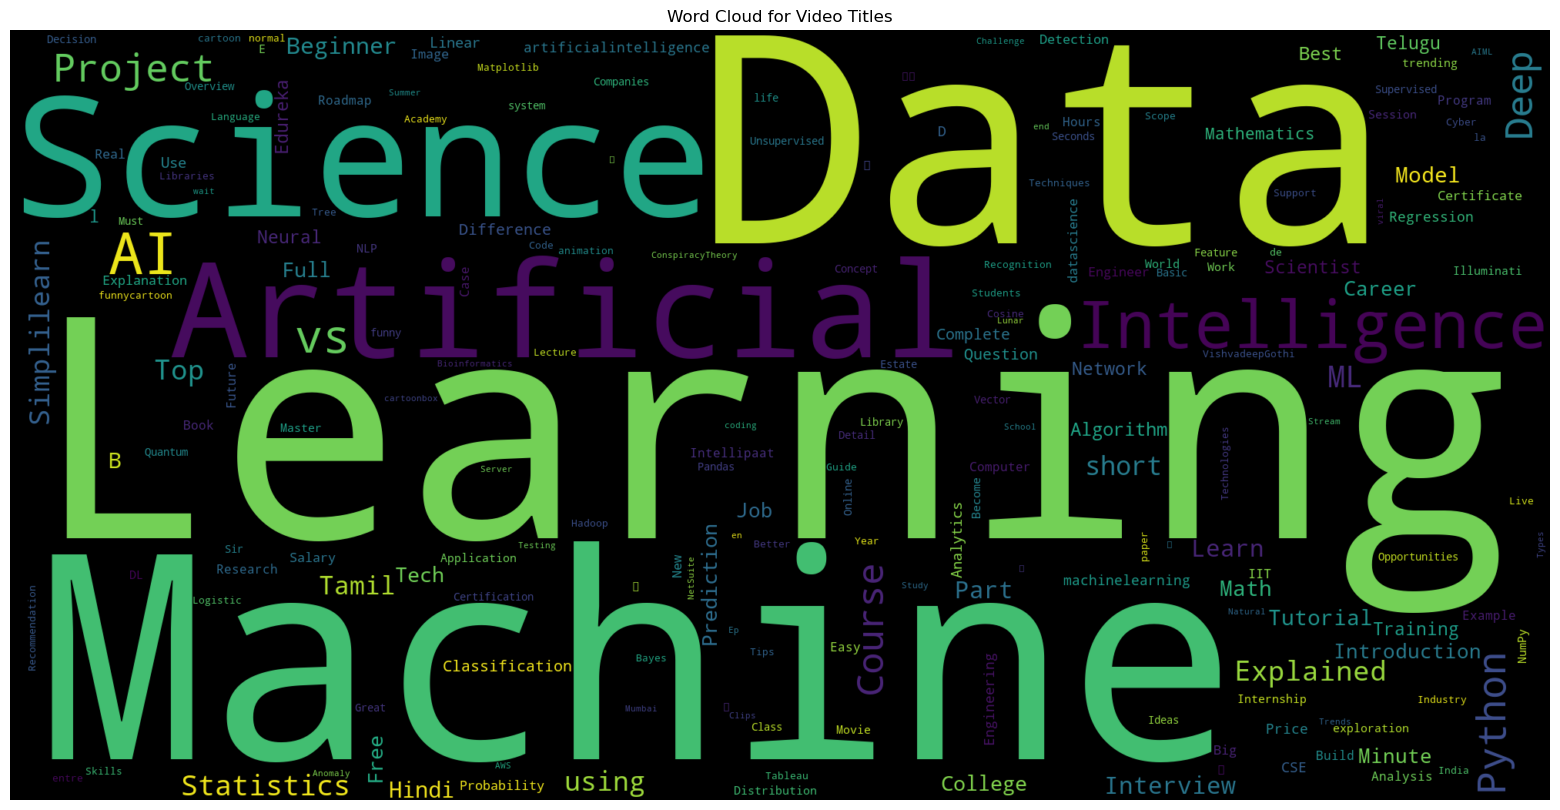

In [252]:
# from wordcloud import WordCloud, STOPWORDS


# # Sample DataFrame creation for context
# # video_stats = pd.DataFrame({'title': ['Google Launched 5 FREE Data Science Courses!', 'Machine Learning vs Data Science', '10 ML algorithms in 45 minutes', 'Data Science Vs Machine Learning- Which is Better?', 'Books Recommendation system project']})

# # Define stopwords
# stop_words = set(STOPWORDS)

# # Remove stopwords from the titles
# v_stat['title_no_stopwords'] = v_stat['title'].apply(lambda x: [item for item in str(x).split() if item.lower() not in stop_words])

# # Combine all words into a single list
# all_words = [word for title in v_stat['title_no_stopwords'] for word in title]
# all_words_str = ' '.join(all_words)

# # Function to plot word cloud
# def plot_cloud(wordcloud):
#     plt.figure(figsize=(20, 10))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')

# # Generate word cloud
# wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', colormap='viridis', collocations=False).generate(all_words_str)

# # Plot the word cloud
# plot_cloud(wordcloud)
# plt.title('Word Cloud for Video Titles')
# plt.show()